In [1]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')

**Print first 5 rows of data**

In [2]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **1. DATA CLEANING**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Renaming the columns: v1->target and v2->text**

In [5]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
4805,ham,Call me when u finish then i come n pick u.
4155,ham,"Yo, call me when you get the chance, a friend ..."
5042,ham,O ic lol. Should play 9 doors sometime yo
2542,ham,Aiyo please Ì_ got time meh.
3881,ham,Short But Cute: \Be a good person


**Converting Categorical data into numeric data**

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])
data.head()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**Checking Missing Values**

In [14]:
data.isnull().sum()

,0
target,0
text,0


**Check for Duplicate Values and Removing Them**

In [15]:
# Checking Duplicate values
print('No of Duplicate Values = ', data.duplicated().sum())
# remove duplicates
data = data.drop_duplicates(keep='first')

No of Duplicate Values =  403


In [16]:
# Recheck Duplicate Values
print('No of Duplicate Values After Removing = ', data.duplicated().sum())

No of Duplicate Values After Removing =  0


In [17]:
data.shape

(5169, 2)

# **2. EXPLORATORY DATA ANALYSIS**

In [18]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data['target'].value_counts()

,count
target,
0,4516
1,653


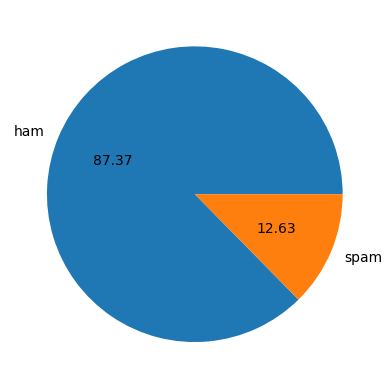

In [20]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

SPAM SMS : 87.37%

Non Spam SMS : 12.63%

**Imbalanced Data**

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Counting the Number of characters,Words and Sentences of each message**

In [22]:
data['num_characters'] = data['text'].apply(len)

In [23]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**NON SPAM MESSAGES**

In [28]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**SPAM MESSAGES**

In [29]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**DATA VISUALISATION**

In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

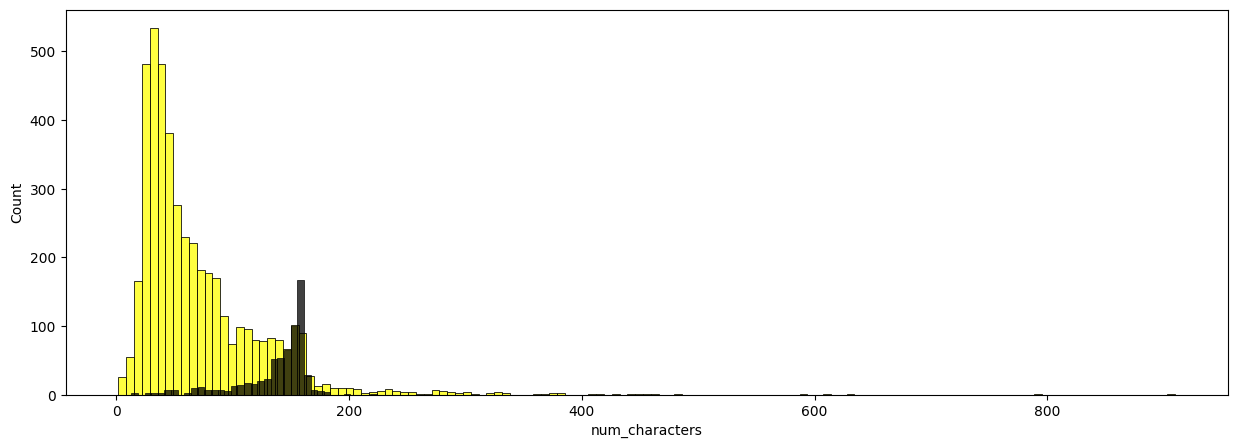

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(data[data['target']==0]['num_characters'],color="yellow")
sns.histplot(data[data['target']==1]['num_characters'],color="black")

<Axes: xlabel='num_words', ylabel='Count'>

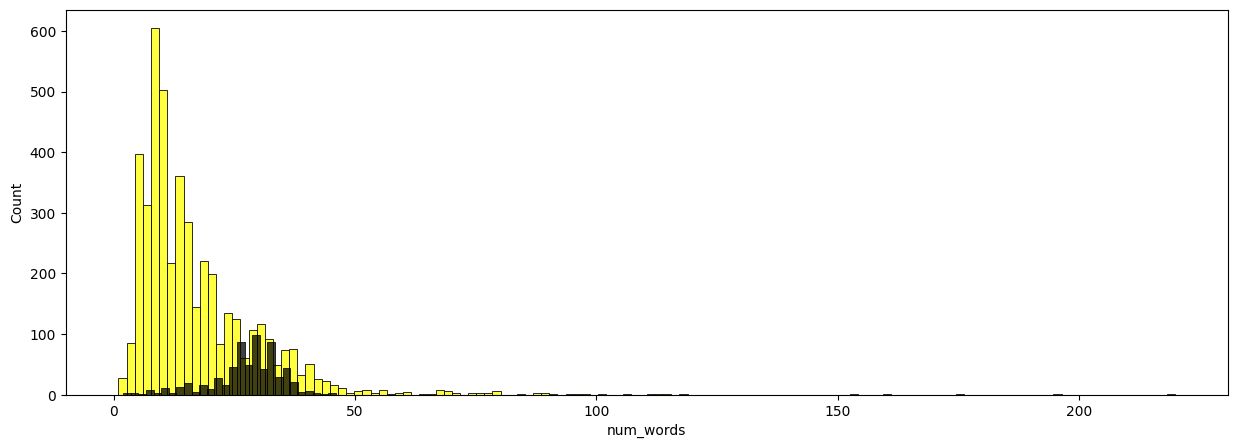

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(data[data['target']==0]['num_words'],color="yellow")
sns.histplot(data[data['target']==1]['num_words'],color="black")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

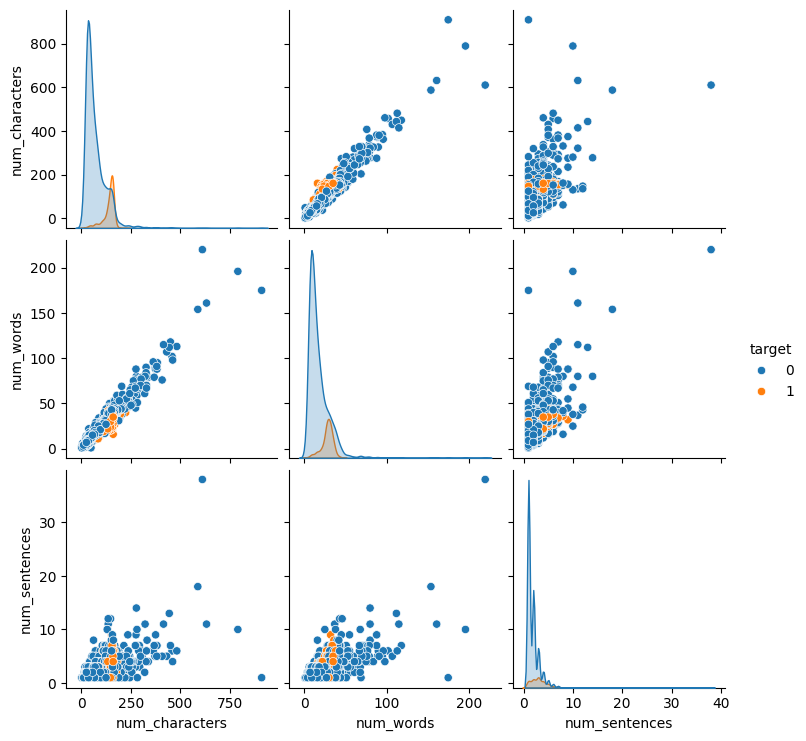

In [33]:
sns.pairplot(data,hue='target')

In [34]:
import numpy as np

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


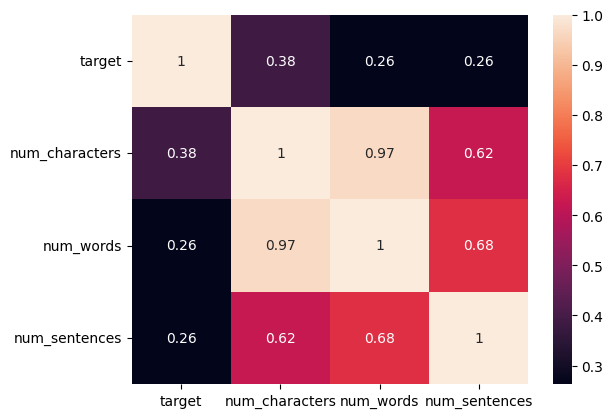

In [35]:
d = data.select_dtypes(include=[np.number])
sns.heatmap(d.corr(), annot=True)
d.corr()

In [36]:
# Multi-collinearity found in the dataset

# **3. Data Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming







In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [39]:
def transform_text (text):

    #converting to lower case
    text = text.lower()

    #tokenization
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    #updating the text after removed special characters
    text = removedSC[:]

    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]

    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))

    text = stemmed[:]

    return " ".join(text)

In [40]:
#stopwords.words('english') is a function of 'nltk', returns list of english stop words
#string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
#stemming the data using 'PorterStemmer' algorithm.nltk module provides this class to use.

In [41]:
transform_text("Nothing is impossible..Work Hard")

'noth imposs work hard'

Create a new column to store the transformed text -> 'processed'

In [42]:
data['Processed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_characters,num_words,num_sentences,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')

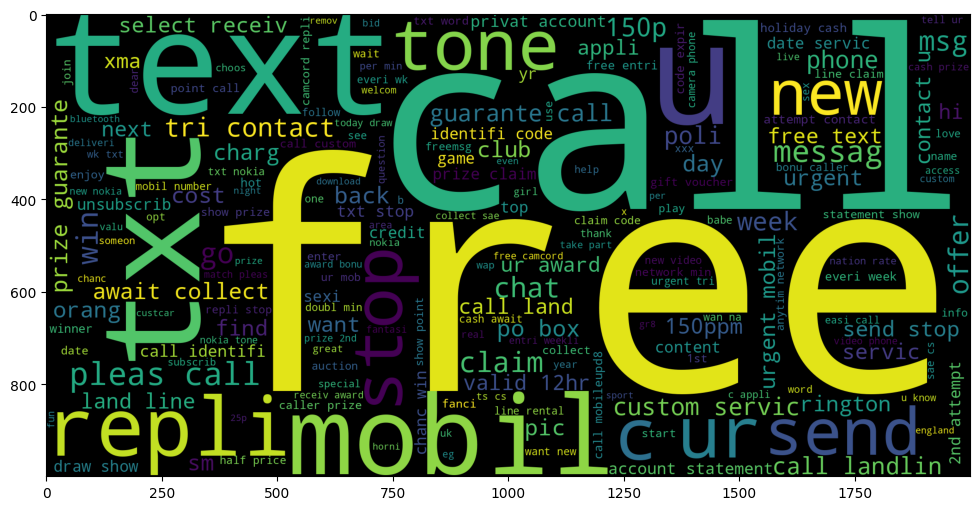

In [44]:
spam_ = wc.generate(data[data['target']==1]['Processed_text'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_);

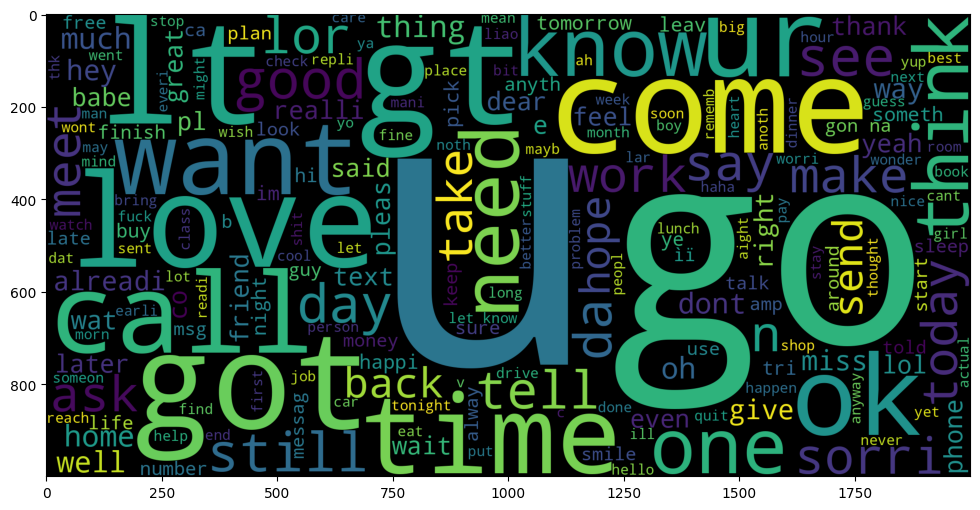

In [45]:
ham_ = wc.generate(data[data['target']==0]['Processed_text'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_);

In [46]:
spamWords = list()
for msg in data[data['target'] == 1]['Processed_text'].tolist():
  for word in msg.split():
    spamWords.append(word)
len(spamWords)

9939

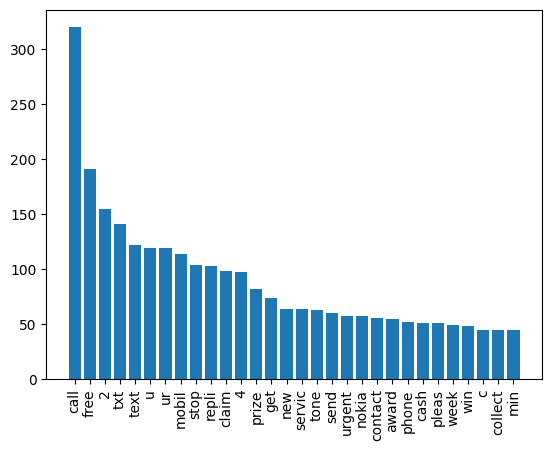

In [47]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spamWords).most_common(30))[0], pd.DataFrame(Counter(spamWords).most_common(30))[1])
plt.xticks(rotation = 'vertical');

words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

# **Train and Test Split**

In [48]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [49]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [86]:
# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 100)

# Fit and transform the text column
X = tf.fit_transform(data['Processed_text']).toarray()
X.shape

(5169, 100)

In [88]:
#storing the values of the 'TARGET' column
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(len(X_train), len(X_test), len(y_train) + len(y_test))

4135 1034 5169


In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### **Gaussian Naive Bayes**

In [91]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(f"Precision Score {precision_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))

Accuracy Score: 0.5686653771760155
Precision Score 0.22887323943661972
[[458 438]
 [  8 130]]


### **Multinomial Naive Bayes**

In [92]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9410058027079303
[[889   7]
 [ 54  84]]
Precision Score 0.9230769230769231


### **Bernouli Naive Bayes**

In [93]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(f"Precision Score {precision_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))

Accuracy Score: 0.9448742746615088
Precision Score 0.8932038834951457
[[885  11]
 [ 46  92]]


As data is IMBALANCED, precision score matters more than accuracy.
Using TfidfVectorizer method, we get precision score = 1 for MultinomialNB
So we will use this only

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [95]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))

In [96]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)
df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})

In [97]:
df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes,94.10,92.31,60.87,73.36
1,Logistic Regression,94.87,90.48,68.84,78.19
2,Support Vector Machine,95.45,90.27,73.91,81.27
3,Random Forest Classifier,95.74,89.17,77.54,82.95


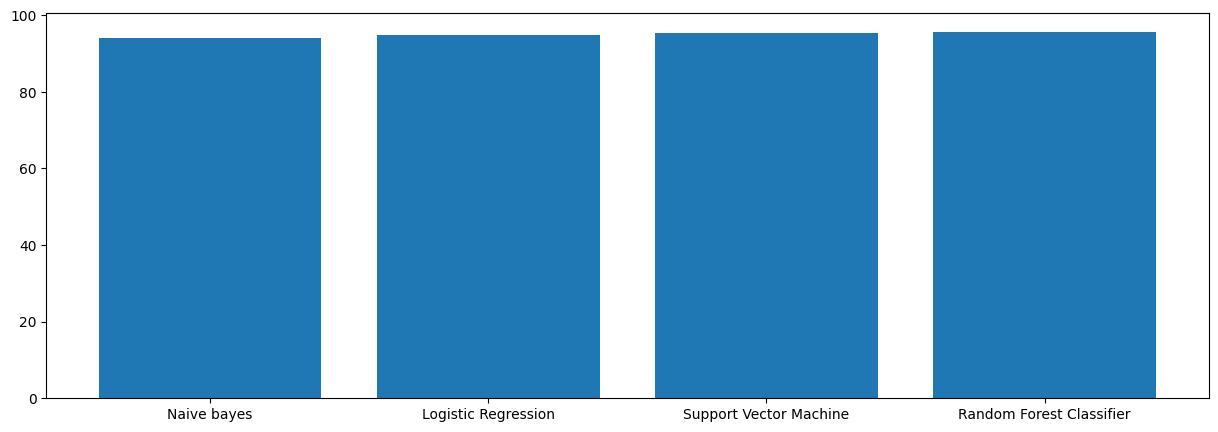

In [102]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['Accuracy']);

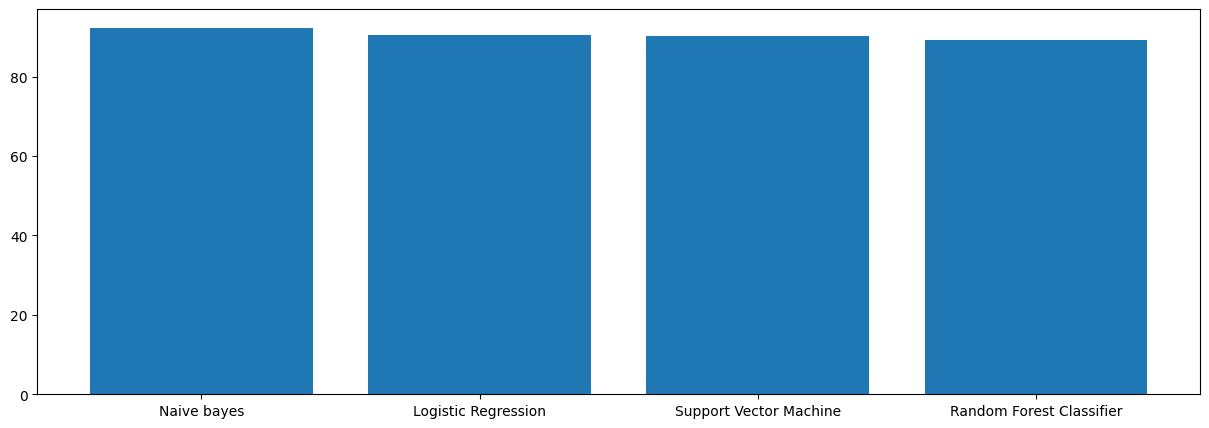

In [103]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['Precision']);

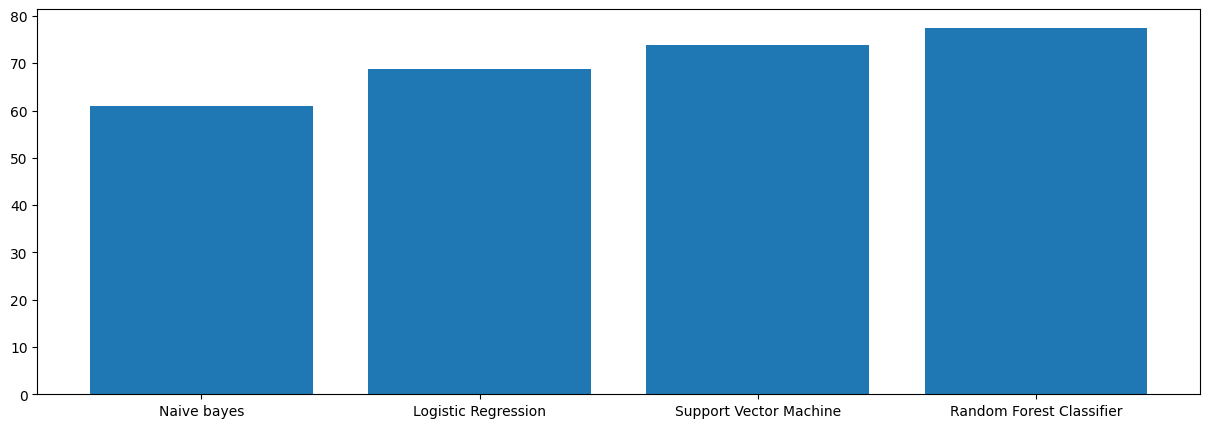

In [104]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['Recall']);

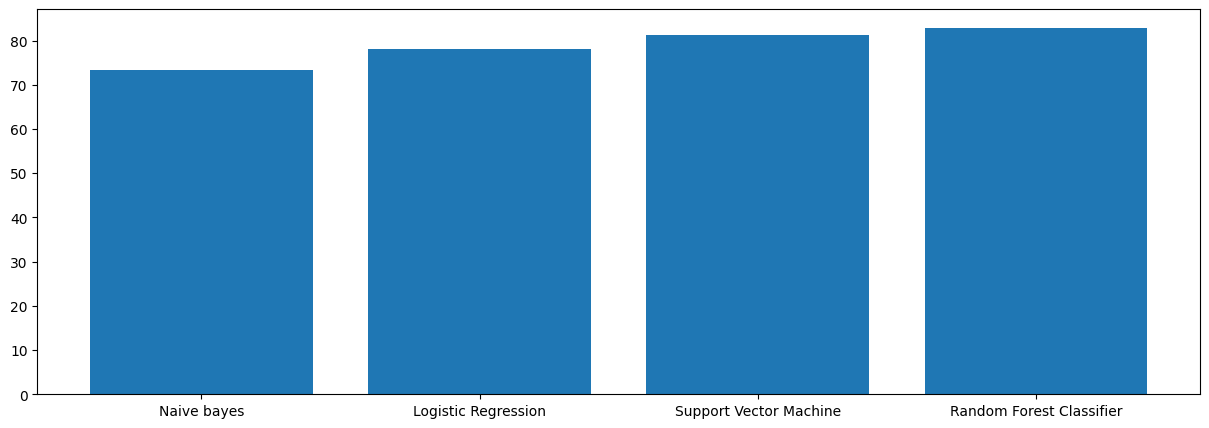

In [101]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['F1 Score']);

In [98]:
import pickle

pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [99]:
tf_idf = pickle.load(open("vectorizer.pkl", 'rb'))
model = pickle.load(open("model.pkl", 'rb'))

In [116]:
sms = input("Enter SMS: ")
# 1. Preprocess
transformed_sms = transform_text(sms)

# 2. Vectorize
vect_input = tf_idf.transform([transformed_sms])

# 3. Predict
result = model.predict(vect_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Enter SMS: Are you free
Spam
